In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.datasets as datasets
%matplotlib inline

In [2]:
mnist = datasets.MNIST()
train_data, train_label_, test_data, test_label_ = mnist.load()

In [3]:
train_data = train_data / 255.
test_data = test_data / 255.

input_size = 784
hidden_1 = 10
output_size = 10

learning_rate = 0.0001
batch_size = 64#300

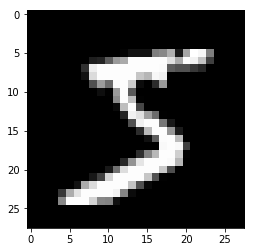

In [4]:
plt.imshow(train_data[0].reshape(28,28), cmap='gray')

In [5]:
import mylibrary.nnlib as tnn

train_label = tnn.Logits.index_to_logit(train_label_)
train_size = len(train_label)

## Using Relu Activation

In [20]:
net = tnn.AutoForm(new_layers=True)
optimizer = tnn.Adam(learning_rate)
layer1 = tnn.LinearLayer(input_size, hidden_1+1, optimizer=optimizer)
# layer2 = tnn.DoubleReluLayer(hidden_1, optimizer=optimizer)
layer2 = tnn.Relu()
layer3 = tnn.NonLinearLayer(hidden_1+1, output_size, activation=tnn.Softmax(), optimizer=optimizer)
# layer3 = tnn.LinearLayer(hidden_1+1, output_size, optimizer=optimizer)

# a1 = layer1.forward(train_data)
# a2 = layer2.forward(a1)
# a3 = layer3.forward(a2)

In [22]:
accuracy_list = []
for epoch in range(20):
    for index in range(train_size // batch_size):
        train_x = train_data[index * batch_size:(index + 1) * batch_size]
        train_y = train_label[index * batch_size:(index + 1) * batch_size]

#         a1 = layer1.forward(train_data)
#         a2 = layer2.forward(a1)
#         yout = layer3.forward(a2)
        yout = net.forward(train_x)

        dy = tnn.CrossEntropyLoss.del_loss(yout, train_y)
        loss = tnn.CrossEntropyLoss.loss(yout, train_y)
#         dy = tnn.SoftmaxCrossEntropy.del_loss(yout, train_y)
#         loss = tnn.SoftmaxCrossEntropy.loss(yout, train_y)
        dx = net.backward(dy)

        net.update()
        if index % 100 == 0:
            print('\nTRAIN',index, '-> ', loss)
            yout = net.forward(train_data)
            outputs = tnn.Logits.logit_to_index(yout)
            correct = (outputs == np.array(train_label_)).sum()

            accuracy = correct / len(train_label_) * 100.
            print('EPOCH = ',epoch,'accuracy = ', accuracy)
            print(correct, '/', len(train_label_))
            
            yout = net.forward(test_data)
            outputs = tnn.Logits.logit_to_index(yout)
            correct = (outputs == np.array(test_label_)).sum()

            accuracy = correct / len(test_label_) * 100.
            print('   TEST  ','accuracy = ', accuracy)
            print(correct, '/', len(test_label_))            


TRAIN 0 ->  0.18687067358755355
EPOCH =  0 accuracy =  92.52166666666668
55513 / 60000
   TEST   accuracy =  92.56
9256 / 10000

TRAIN 100 ->  0.24726645262027144
EPOCH =  0 accuracy =  92.53333333333333
55520 / 60000
   TEST   accuracy =  92.57
9257 / 10000

TRAIN 200 ->  0.22119400738614434
EPOCH =  0 accuracy =  92.54
55524 / 60000
   TEST   accuracy =  92.49000000000001
9249 / 10000

TRAIN 300 ->  0.3056522888677459
EPOCH =  0 accuracy =  92.57
55542 / 60000
   TEST   accuracy =  92.60000000000001
9260 / 10000

TRAIN 400 ->  0.24141334652535573
EPOCH =  0 accuracy =  92.60000000000001
55560 / 60000
   TEST   accuracy =  92.67
9267 / 10000

TRAIN 500 ->  0.28769732680170573
EPOCH =  0 accuracy =  92.62333333333333
55574 / 60000
   TEST   accuracy =  92.63
9263 / 10000

TRAIN 600 ->  0.1691579540955024
EPOCH =  0 accuracy =  92.62666666666667
55576 / 60000
   TEST   accuracy =  92.61
9261 / 10000

TRAIN 700 ->  0.3431778822985456
EPOCH =  0 accuracy =  92.61500000000001
55569 / 6000


TRAIN 400 ->  0.23210720674001428
EPOCH =  6 accuracy =  93.12833333333333
55877 / 60000
   TEST   accuracy =  93.03
9303 / 10000

TRAIN 500 ->  0.2703542331437006
EPOCH =  6 accuracy =  93.15333333333334
55892 / 60000
   TEST   accuracy =  93.01
9301 / 10000

TRAIN 600 ->  0.14438035786162134
EPOCH =  6 accuracy =  93.105
55863 / 60000
   TEST   accuracy =  92.97
9297 / 10000

TRAIN 700 ->  0.3363629964608736
EPOCH =  6 accuracy =  93.14833333333333
55889 / 60000
   TEST   accuracy =  92.86
9286 / 10000

TRAIN 800 ->  0.21594731346361437
EPOCH =  6 accuracy =  93.15666666666667
55894 / 60000
   TEST   accuracy =  92.9
9290 / 10000

TRAIN 900 ->  0.38791613187594687
EPOCH =  6 accuracy =  93.185
55911 / 60000
   TEST   accuracy =  92.88
9288 / 10000

TRAIN 0 ->  0.15912413159647693
EPOCH =  7 accuracy =  93.12666666666667
55876 / 60000
   TEST   accuracy =  92.89
9289 / 10000

TRAIN 100 ->  0.23919019771506478
EPOCH =  7 accuracy =  93.15833333333333
55895 / 60000
   TEST   accuracy =


TRAIN 900 ->  0.38689015453184394
EPOCH =  12 accuracy =  93.50666666666667
56104 / 60000
   TEST   accuracy =  93.10000000000001
9310 / 10000

TRAIN 0 ->  0.1443277561180613
EPOCH =  13 accuracy =  93.49499999999999
56097 / 60000
   TEST   accuracy =  93.12
9312 / 10000

TRAIN 100 ->  0.2355156231803338
EPOCH =  13 accuracy =  93.48333333333333
56090 / 60000
   TEST   accuracy =  93.12
9312 / 10000

TRAIN 200 ->  0.1856956279630977
EPOCH =  13 accuracy =  93.49333333333333
56096 / 60000
   TEST   accuracy =  93.04
9304 / 10000

TRAIN 300 ->  0.2672338224628741
EPOCH =  13 accuracy =  93.515
56109 / 60000
   TEST   accuracy =  93.16
9316 / 10000

TRAIN 400 ->  0.21824092671022466
EPOCH =  13 accuracy =  93.51333333333334
56108 / 60000
   TEST   accuracy =  93.25
9325 / 10000

TRAIN 500 ->  0.2555787363103943
EPOCH =  13 accuracy =  93.535
56121 / 60000
   TEST   accuracy =  93.19
9319 / 10000

TRAIN 600 ->  0.12754833167053328
EPOCH =  13 accuracy =  93.49333333333333
56096 / 60000
  

EPOCH =  19 accuracy =  93.74166666666667
56245 / 60000
   TEST   accuracy =  93.34
9334 / 10000

TRAIN 200 ->  0.18120861194384552
EPOCH =  19 accuracy =  93.755
56253 / 60000
   TEST   accuracy =  93.22
9322 / 10000

TRAIN 300 ->  0.2560436688538691
EPOCH =  19 accuracy =  93.80333333333334
56282 / 60000
   TEST   accuracy =  93.32000000000001
9332 / 10000

TRAIN 400 ->  0.2073416230238842
EPOCH =  19 accuracy =  93.77333333333333
56264 / 60000
   TEST   accuracy =  93.46
9346 / 10000

TRAIN 500 ->  0.24636886455772458
EPOCH =  19 accuracy =  93.79333333333332
56276 / 60000
   TEST   accuracy =  93.44
9344 / 10000

TRAIN 600 ->  0.12009446498736216
EPOCH =  19 accuracy =  93.76
56256 / 60000
   TEST   accuracy =  93.44
9344 / 10000

TRAIN 700 ->  0.3290602108791895
EPOCH =  19 accuracy =  93.75166666666667
56251 / 60000
   TEST   accuracy =  93.30000000000001
9330 / 10000

TRAIN 800 ->  0.20551019700919707
EPOCH =  19 accuracy =  93.76666666666667
56260 / 60000
   TEST   accuracy =  

In [11]:
yout = net.forward(train_data)
dy = tnn.CrossEntropyLoss.del_loss(yout, train_label)
dx = net.backward(dy)

In [12]:
layer2.x.shape, layer3.input.shape

((60000, 11), (60000, 11))

In [13]:
i=0

0


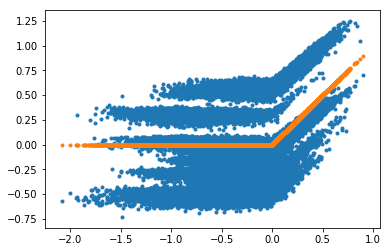

In [14]:
# a1 = layer2.input
# a2 = layer2.output
a1 = layer2.x # layer2 input
a2 = layer3.input # layer2 output

a2_ = a2 - layer2.del_output
plt.scatter(a1[:, i], a2_[:, i], marker='.')
plt.scatter(a1[:, i], a2[:, i], marker='.')

print(i)
i+=1

In [15]:
layer2.del_output.max()

1.3026205310221919

## Using Double Relu Activation Function (Layer)

In [16]:
net = tnn.AutoForm(new_layers=True)
optimizer = tnn.Adam(learning_rate)
layer1 = tnn.LinearLayer(input_size, hidden_1, optimizer=optimizer)
layer2 = tnn.DoubleRelu()
layer3 = tnn.NonLinearLayer(hidden_1*2, output_size, activation=tnn.Softmax(), optimizer=optimizer)

accuracy_list = []
for epoch in range(20):
    for index in range(train_size // batch_size):
        train_x = train_data[index * batch_size:(index + 1) * batch_size]
        train_y = train_label[index * batch_size:(index + 1) * batch_size]

        yout = net.forward(train_x)
        dy = tnn.CrossEntropyLoss.del_loss(yout, train_y)
        loss = tnn.CrossEntropyLoss.loss(yout, train_y)
        dx = net.backward(dy)
        net.update()

        if index % 100 == 0:
            print('\nTRAIN',index, '-> ', loss)
            yout = net.forward(train_data)
            outputs = tnn.Logits.logit_to_index(yout)
            correct = (outputs == np.array(train_label_)).sum()

            accuracy = correct / len(train_label_) * 100.
            print('EPOCH = ',epoch,'accuracy = ', accuracy)
            print(correct, '/', len(train_label_))
            
            yout = net.forward(test_data)
            outputs = tnn.Logits.logit_to_index(yout)
            correct = (outputs == np.array(test_label_)).sum()

            accuracy = correct / len(test_label_) * 100.
            print('   TEST  ','accuracy = ', accuracy)
            print(correct, '/', len(test_label_))            


TRAIN 0 ->  2.279610338514861
EPOCH =  0 accuracy =  11.991666666666667
7195 / 60000
   TEST   accuracy =  11.940000000000001
1194 / 10000

TRAIN 100 ->  2.1084144434379817
EPOCH =  0 accuracy =  28.496666666666666
17098 / 60000
   TEST   accuracy =  28.51
2851 / 10000

TRAIN 200 ->  1.9177308104704949
EPOCH =  0 accuracy =  39.525
23715 / 60000
   TEST   accuracy =  38.91
3891 / 10000

TRAIN 300 ->  1.679879269398607
EPOCH =  0 accuracy =  47.82833333333333
28697 / 60000
   TEST   accuracy =  47.28
4728 / 10000

TRAIN 400 ->  1.5280725815473066
EPOCH =  0 accuracy =  55.23833333333334
33143 / 60000
   TEST   accuracy =  54.67999999999999
5468 / 10000

TRAIN 500 ->  1.4969137278110098
EPOCH =  0 accuracy =  59.971666666666664
35983 / 60000
   TEST   accuracy =  59.68
5968 / 10000

TRAIN 600 ->  1.3537814565127584
EPOCH =  0 accuracy =  65.70333333333333
39422 / 60000
   TEST   accuracy =  65.44
6544 / 10000

TRAIN 700 ->  1.3652016032682799
EPOCH =  0 accuracy =  69.935
41961 / 60000


KeyboardInterrupt: 

In [ ]:
yout = net.forward(train_data)
dy = tnn.CrossEntropyLoss.del_loss(yout, train_label)
dx = net.backward(dy)

In [ ]:
i=0
layer1.output.shape, layer3.output.shape

In [ ]:
a1 = layer1.output
a2 = layer3.input

a2_ = a2 - layer2.del_output
plt.scatter(a1[:, i], a2_[:, i], marker='.')
plt.scatter(a1[:, i], a2[:, i], marker='.')
print(i)
i+=1

In [ ]:
layer2.del_output.max()